In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.cluster import KMeans,kmeans_plusplus,DBSCAN
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score

In [5]:
country_data_df = pd.read_csv("Country_socioeconomic-data.csv")
country_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
country_data_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
numeric_cols = list(country_data_df.select_dtypes(['float64','int64']).columns)
numeric_cols

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

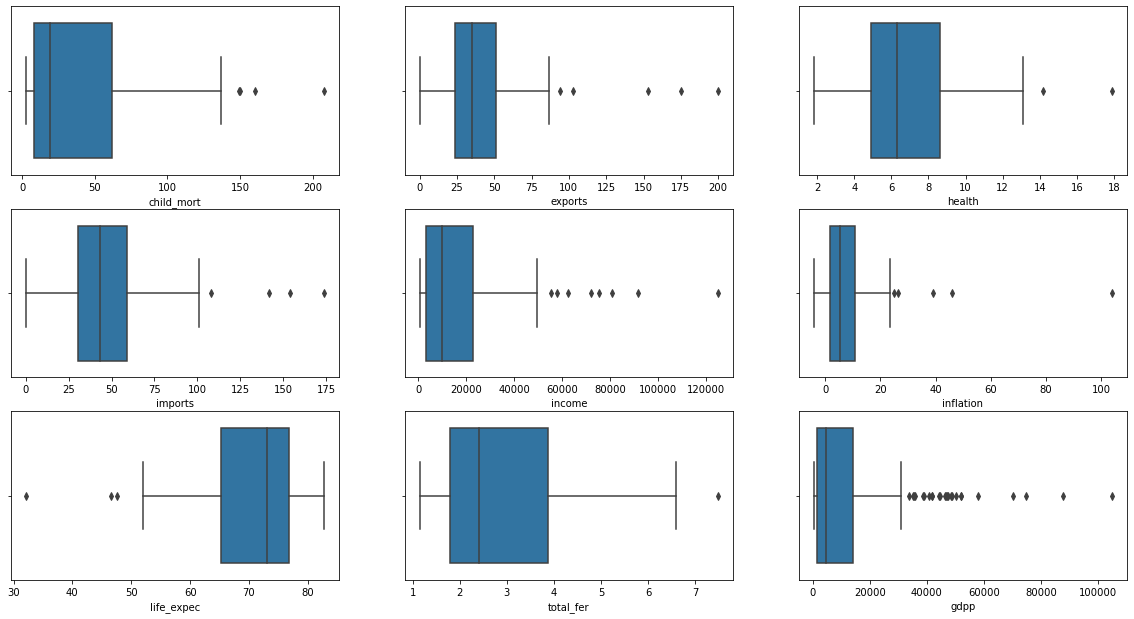

In [8]:
fig = plt.figure(figsize=(20,18))
i=0
for each_col in numeric_cols:
    plt.subplot(5,3,i+1)
    sns.boxplot(each_col,data=country_data_df)
    i+=1

##### Detecting outliers using IQR method

data = sorted(country_data_df["child_mort"])
q1 = np.percentile(data,25)
q3 = np.percentile(data,75)
iqr = q3-q1
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr
country_data_df[(country_data_df["child_mort"]<q1)|(country_data_df["child_mort"]>q3)]["child_mort"]

#### Treating outliers using the capping method (10th and 90th percentile)

In [9]:
tenth_percentile = np.percentile(country_data_df["child_mort"], 10)
ninetieth_percentile = np.percentile(country_data_df["child_mort"], 90)
treated = np.where(country_data_df["child_mort"]>ninetieth_percentile, ninetieth_percentile,country_data_df["child_mort"])
treated = np.where(treated<tenth_percentile, tenth_percentile,treated)
country_data_df["child_mort"] = treated

In [10]:
#there are many outliers present lets treat them 
for each_col in numeric_cols:
    tenth_percentile = np.percentile(country_data_df[each_col], 10)
    ninetieth_percentile = np.percentile(country_data_df[each_col], 90)
    treated = np.where(country_data_df[each_col]>ninetieth_percentile, ninetieth_percentile,country_data_df[each_col])
    treated = np.where(treated<tenth_percentile, tenth_percentile,treated)
    country_data_df[each_col] = treated

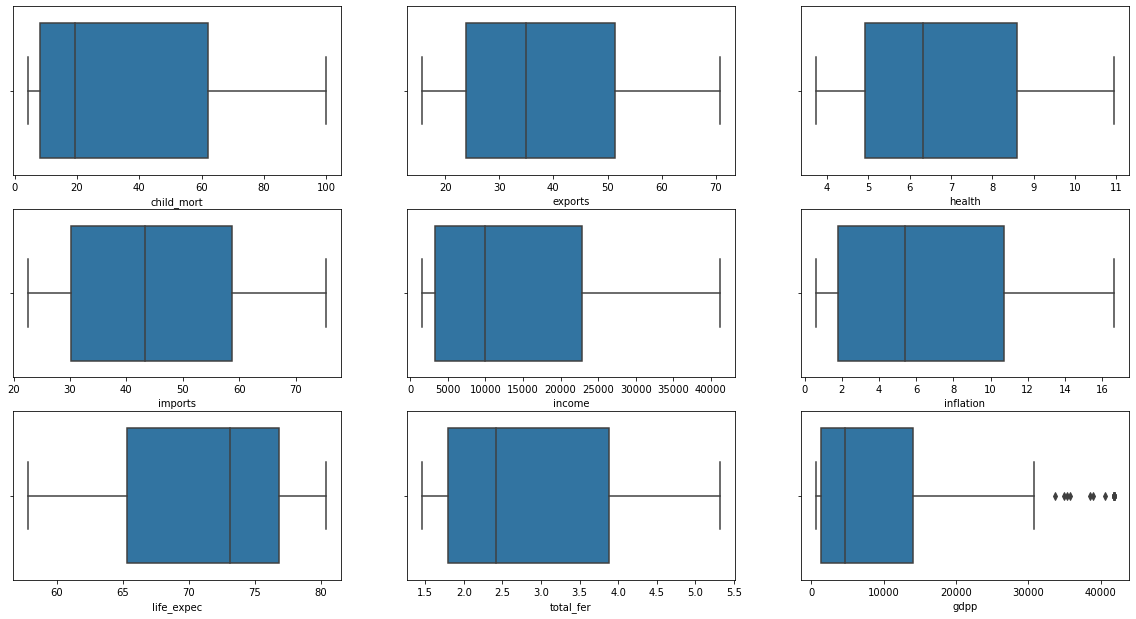

In [11]:
fig = plt.figure(figsize=(20,18))
i=0
for each_col in numeric_cols:
    plt.subplot(5,3,i+1)
    sns.boxplot(each_col,data=country_data_df)
    i+=1

## Most of the outliers are treated

In [12]:
X = country_data_df.drop("country",axis=1) 
y = country_data_df["country"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

### Standardise the data

In [14]:
sc = StandardScaler()
X_train_std_arr = sc.fit_transform(X_train)
X_train_std_df = pd.DataFrame(data = X_train_std_arr)

In [15]:
X_test_std_arr = sc.transform(X_test)
X_test_std_df = pd.DataFrame(data = X_test_std_arr)

### KMEANS

In [16]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X_train_std_df)

KMeans(n_clusters=3, random_state=42)

In [17]:
kmeans.labels_

array([0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1,
       0, 1, 1, 2, 1, 2, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0,
       1, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0, 0, 1, 0,
       1, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 1, 1,
       1, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0])

In [18]:
print("WCSS",kmeans.inertia_)
print("Silhotte score",silhouette_score(X_train_std_df,kmeans.labels_))

WCSS 558.6892801450928
Silhotte score 0.27633058053434395


### WCSS

In [19]:
wcss = []

no_of_clusters = np.arange(2,11,1)
for i in no_of_clusters:
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X_train_std_df)
    inertia = kmeans.inertia_
    wcss.append(inertia)

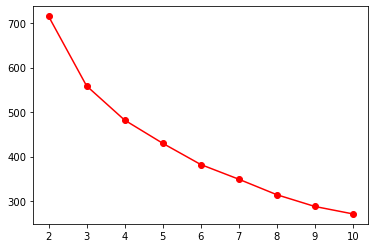

In [20]:
plt.plot(no_of_clusters,wcss,'ro-')
plt.show()

### Silhoutte score

In [21]:
silhoutte_scores = []

no_of_clusters = np.arange(2,11,1)
for i in no_of_clusters:
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X_train_std_df)
    output_labels = kmeans.labels_
    sil = silhouette_score(X_train_std_df,output_labels)
    silhoutte_scores.append(sil)

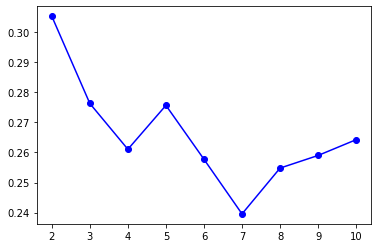

In [22]:
plt.plot(no_of_clusters,silhoutte_scores,'bo-')
plt.show()

#### From both the WCSS and Silhoutte score methos we were able to see that the optimum clusters are 2

In [23]:
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(X_train_std_df)
print("WCSS",kmeans.inertia_)
print("Silhotte score",silhouette_score(X_train_std_df,kmeans.labels_))
print("CLuster Centroids",kmeans.cluster_centers_)

WCSS 715.2756732381758
Silhotte score 0.3053869829524332
CLuster Centroids [[-0.75336996  0.29316475  0.35443098  0.02469976  0.62684556 -0.30073109
   0.78633216 -0.74798551  0.55375513]
 [ 0.89875714 -0.34974041 -0.42282994 -0.02946638 -0.74781575  0.35876691
  -0.93808048  0.89233359 -0.66062015]]


### Kmeans Predictions

In [24]:
predicted_labels = kmeans.predict(X_test_std_df)
print("Silhotte score",silhouette_score(X_test_std_df,predicted_labels))

Silhotte score 0.22661147026357678


#### It has done prettey descent job along the 1st two dimensions

### Kmeans clustering on the train Data

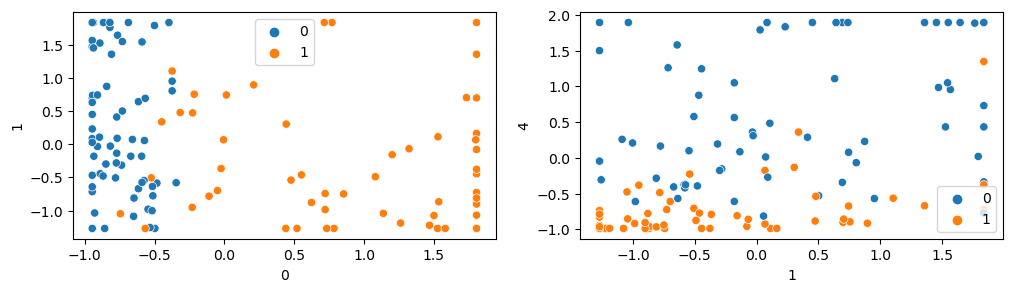

In [25]:
plt.figure(figsize=(12,3),dpi=100)
plt.subplot(1,2,1)
sns.scatterplot(x=0,y=1,data=X_train_std_df,hue=kmeans.labels_)

plt.subplot(1,2,2)
sns.scatterplot(x=1,y=4,data=X_train_std_df,hue=kmeans.labels_)
plt.show()

### Kmeans clustering on the test Data

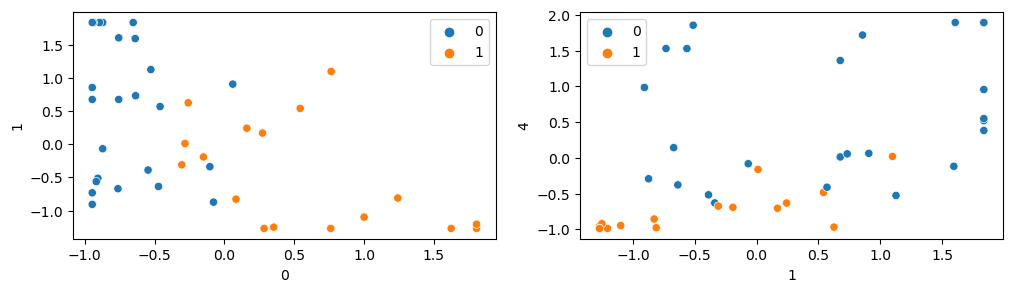

In [26]:
plt.figure(figsize=(12,3),dpi=100)
plt.subplot(1,2,1)
sns.scatterplot(x=0,y=1,data=X_test_std_df,hue=predicted_labels)

plt.subplot(1,2,2)
sns.scatterplot(x=1,y=4,data=X_test_std_df,hue=predicted_labels)
plt.show()

### PCA

In [27]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std_df)
X_train_pca_df = pd.DataFrame(X_train_pca,columns=["PCA1","PCA2"])

In [28]:
X_test_pca =  pca.transform(X_test_std_df)
X_test_pca_df = pd.DataFrame(X_test_pca,columns=["PCA1","PCA2"])

In [29]:
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(X_train_pca_df)
print("WCSS",kmeans.inertia_)
print("Silhotte score",silhouette_score(X_train_pca_df,kmeans.labels_))

WCSS 340.42382951757634
Silhotte score 0.44701997343268335


In [30]:
predicted_labels = kmeans.predict(X_test_pca_df)
print("Silhotte score",silhouette_score(X_test_pca_df,predicted_labels))

Silhotte score 0.35874683305702276


In [ ]:
## The Sil score improved after we did PCA

### Kmeans clustering on the 1st 2 principal components

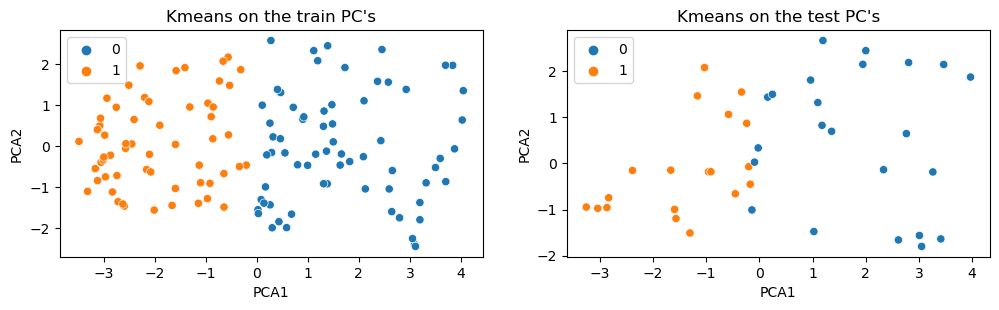

In [32]:
plt.figure(figsize=(12,3),dpi=100)
plt.subplot(1,2,1)
sns.scatterplot(x="PCA1",y="PCA2",data=X_train_pca_df,hue=kmeans.labels_)
plt.title("Kmeans on the train PC's")
plt.subplot(1,2,2)
sns.scatterplot(x="PCA1",y="PCA2",data=X_test_pca_df,hue=predicted_labels)
plt.title("Kmeans on the test PC's")
plt.show()

## DBSCAN

we donot need train test split for DBSCAN the algo sees the entire data and forms the clusters

In [33]:
sc2 = StandardScaler()
X_std_arr = sc2.fit_transform(X)
X_std_df = pd.DataFrame(X_std_arr,columns=X.columns)

In [34]:
dbscan = DBSCAN(eps=1.75,min_samples=10)
dbscan.fit(X_std_df)
dbscan.labels_

array([ 0,  1,  1, -1,  1,  1,  1,  2,  2,  1,  1, -1,  1,  1, -1, -1,  1,
        0,  1,  1,  1, -1,  1, -1,  1,  0,  0,  1,  0,  2,  1,  0,  0,  1,
        1,  1,  0,  0, -1,  1,  0,  1,  1,  1,  2,  1,  1,  1,  1, -1,  0,
        1,  1,  2,  2, -1,  0,  1,  2,  0,  2,  1,  1,  0,  0,  1, -1,  1,
        2,  1,  1,  1, -1, -1,  2,  2,  1,  2,  1,  1,  0, -1, -1,  1,  0,
        1,  1, -1, -1, -1,  1, -1,  1,  0,  0,  1,  1,  0,  1, -1,  1, -1,
       -1, -1,  1,  1,  0,  1, -1,  1,  2,  2,  0,  0,  2, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  0,  1,  1, -1, -1,  1,  1,
       -1, -1,  1,  2,  1,  1,  0,  1,  2,  2, -1,  0,  1, -1,  0,  1,  1,
        1, -1,  0, -1, -1,  2,  2,  1,  1,  1,  1, -1,  0,  0],
      dtype=int64)

In [35]:
sil_score = silhouette_score(X_std_df, dbscan.labels_)
print(sil_score)

0.20022984099985738


# Many poins are classified as noise

Lets find out the performance on the PC's

In [40]:
pca = PCA(n_components=2)
X_pca_arr = pca.fit_transform(X_std_df)
X_pca_df = pd.DataFrame(X_pca_arr,columns=pca.get_feature_names_out())

In [63]:
dbscan2 = DBSCAN(eps=0.6,min_samples=5)
dbscan2.fit(X_pca_df)

DBSCAN(eps=0.6)

In [64]:
 dbscan2.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  2,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0, -1,  2,  1,  0,  0,  0,  0,  0,  0,
        2,  0,  1,  1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  2,
        1,  0,  0,  0,  0, -1, -1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  3, -1,  0,  0,  0,  3,  3,  0,  2,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  1,  0,  0,  3,  0,
        0,  0,  0,  1, -1,  0,  0,  0,  0,  0,  0,  0,  3,  0, -1,  2,  2,
        0,  0,  0,  1,  0,  0,  0,  0,  1, -1,  0,  0,  3,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  1,  1,  0,  0,  0,  0, -1,  0,  0],
      dtype=int64)

In [65]:
sil_score2 = silhouette_score(X_pca_df, dbscan2.labels_)
print(sil_score2)

0.22030215923302204


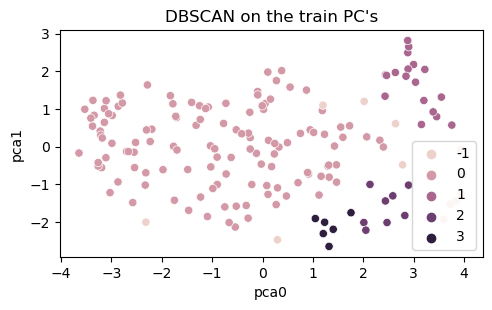

In [69]:
plt.figure(figsize=(12,3),dpi=100)
plt.subplot(1,2,1)
sns.scatterplot(x="pca0",y="pca1",data=X_pca_df,hue=dbscan2.labels_)
plt.title("DBSCAN on the train PC's")
plt.show()

In [ ]:
## finding the right eps value

In [70]:
from sklearn.neighbors import NearestNeighbors

In [88]:
nn = NearestNeighbors(n_neighbors=2)
neighbours = nn.fit(X_std_df)

In [89]:
distances, indices = neighbours.kneighbors(X_std_df)

In [90]:
distances

array([[0.        , 0.9570695 ],
       [0.        , 0.70297854],
       [0.        , 1.1811998 ],
       [0.        , 1.40175147],
       [0.        , 0.823473  ],
       [0.        , 1.26310693],
       [0.        , 0.86540835],
       [0.        , 0.67277092],
       [0.        , 0.59302492],
       [0.        , 1.38535187],
       [0.        , 1.16687075],
       [0.        , 1.67405719],
       [0.        , 0.66231822],
       [0.        , 0.8052866 ],
       [0.        , 1.43472996],
       [0.        , 0.69418321],
       [0.        , 1.0686005 ],
       [0.        , 0.80292779],
       [0.        , 1.06984485],
       [0.        , 1.16532581],
       [0.        , 0.94999634],
       [0.        , 1.46851643],
       [0.        , 1.04626777],
       [0.        , 1.06271749],
       [0.        , 0.49756655],
       [0.        , 0.97568997],
       [0.        , 0.85758163],
       [0.        , 0.92148517],
       [0.        , 0.6249294 ],
       [0.        , 0.57269594],
       [0.

In [91]:
indices

array([[  0,  94],
       [  1,  48],
       [  2, 163],
       [  3,  38],
       [  4, 100],
       [  5,  71],
       [  6,  76],
       [  7,  77],
       [  8,  44],
       [  9,  79],
       [ 10,  13],
       [ 11, 157],
       [ 12, 107],
       [ 13, 121],
       [ 14, 156],
       [ 15, 110],
       [ 16,  52],
       [ 17,  97],
       [ 18,  65],
       [ 19, 120],
       [ 20, 130],
       [ 21, 108],
       [ 22, 160],
       [ 23,  82],
       [ 24,  85],
       [ 25,  97],
       [ 26, 132],
       [ 27,  52],
       [ 28,  31],
       [ 29,  54],
       [ 30, 141],
       [ 31,  28],
       [ 32, 106],
       [ 33, 160],
       [ 34, 119],
       [ 35, 160],
       [ 36,  56],
       [ 37,  63],
       [ 38,   3],
       [ 39, 130],
       [ 40,  32],
       [ 41, 121],
       [ 42, 138],
       [ 43, 135],
       [ 44,   8],
       [ 45,  62],
       [ 46,  45],
       [ 47,  70],
       [ 48,   1],
       [ 49,   3],
       [ 50, 116],
       [ 51,  90],
       [ 52,

In [92]:
distances = np.sort(distances, axis=0)

In [94]:
distances = distances[:,1]
distances

array([0.37387042, 0.37387042, 0.45869156, 0.45869156, 0.49756655,
       0.49756655, 0.49867776, 0.49867776, 0.52312615, 0.56679926,
       0.56679926, 0.57269594, 0.57269594, 0.59038753, 0.59302492,
       0.59302492, 0.62389113, 0.62389113, 0.6249294 , 0.6249294 ,
       0.64810812, 0.64810812, 0.65879897, 0.66231822, 0.67277092,
       0.67277092, 0.67945756, 0.67945756, 0.69418321, 0.69418321,
       0.69950744, 0.70297854, 0.70297854, 0.70521288, 0.71351383,
       0.71664586, 0.73424966, 0.74532551, 0.75289869, 0.75847706,
       0.76018872, 0.76018872, 0.78551724, 0.80292779, 0.8052866 ,
       0.81426631, 0.81871461, 0.823473  , 0.8422555 , 0.8422555 ,
       0.85259369, 0.85259369, 0.85398434, 0.85477635, 0.85522117,
       0.85758163, 0.85758163, 0.86540835, 0.86540835, 0.87347843,
       0.87347843, 0.87446956, 0.89267514, 0.89267514, 0.89975938,
       0.90623863, 0.90623863, 0.91999735, 0.91999735, 0.92148517,
       0.92148517, 0.92801107, 0.92801107, 0.94318268, 0.94318

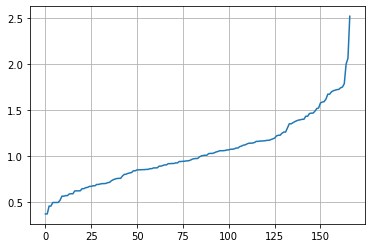

In [97]:
plt.plot(distances)
plt.grid()
plt.show()

In [96]:
len(X)

167

In [ ]:
around 80% of the points ~133 datapoints have distance less than 1.4
so we can choose the distance as < 1.4

In [98]:
nn = NearestNeighbors(n_neighbors=2)
neighbours = nn.fit(X_pca_df)

In [100]:
distances, indices = neighbours.kneighbors(X_pca_df)
distances = np.sort(distances,axis =0)
distances = distances[:,1]

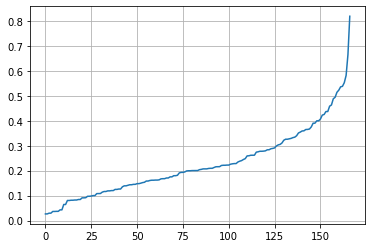

In [101]:
plt.plot(distances)
plt.grid()
plt.show()

In [ ]:
here eps seems to be <0.4

In [156]:
dbscan = DBSCAN(eps=0.5,min_samples=4)
dbscan.fit(X_pca_df)
dbscan.labels_

array([ 0,  1,  1, -1,  2,  5,  1,  3,  6,  1,  1, -1,  1,  1,  2,  4,  2,
        0,  1,  1,  1,  1,  5,  1,  2,  0,  0,  1,  0,  3,  2,  0,  0, -1,
        5,  5,  0,  0, -1, -1,  0,  1, -1, -1,  6,  5,  5,  1,  1,  1,  0,
        7,  1,  6,  3,  0,  0,  1,  6,  0,  3,  1,  1,  0,  0,  1,  0,  7,
        6,  1,  1,  5,  1,  4, -1,  3,  1,  3,  2,  1,  0,  1,  1,  1,  0,
        2,  2,  1,  0,  2,  7,  4,  2,  0,  0,  8,  8,  0,  7, -1,  2,  1,
        2,  1,  2,  1,  0,  1,  1,  1,  4,  3,  0,  0,  3,  2,  0,  8,  2,
        5,  1,  1, -1, -1,  1,  5,  1,  1,  1,  0,  1,  8,  0,  4,  7, -1,
        1,  1,  1,  3,  1,  1,  0,  1,  6, -1, -1,  0,  8, -1,  0,  1,  2,
        5,  1,  0,  1, -1,  3,  3,  5,  1,  1,  5, -1,  0,  0],
      dtype=int64)

In [157]:
sil_score = silhouette_score(X_pca_df, dbscan.labels_)
print(sil_score)

0.22340485176086844


In [161]:
clusters = dbscan.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

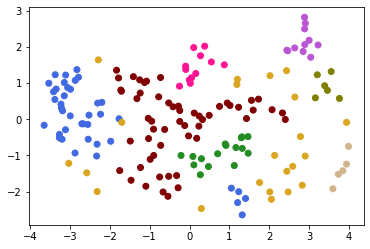

In [173]:
plt.scatter(X_pca_df.iloc[:,0], X_pca_df.iloc[:,1], c=vectorizer(clusters))
plt.show()

### Hirarchical clustering

## Single linkage

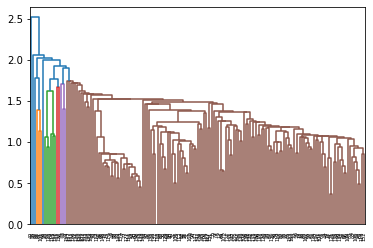

In [174]:
# single linkage
sl_mergings = linkage(X_std_df, method="single", metric='euclidean')
dendrogram(sl_mergings)
plt.show()

## Complete linkage

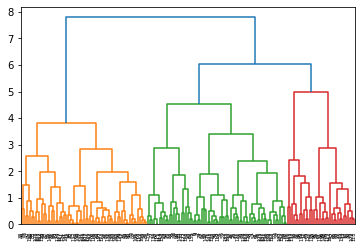

In [197]:
# complete linkage
cl_mergings = linkage(X_pca_df, method="complete", metric='euclidean')
dendrogram(cl_mergings)
plt.show()

In [198]:
# 4 clusters using single linkge
sl_cluster_labels = cut_tree(sl_mergings, n_clusters=4).reshape(-1, )
sl_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [182]:
print(silhouette_score(X_std_df,sl_cluster_labels))

0.00014738466491591464


In [199]:
# 4 clusters using complete linkage
cl_cluster_labels = cut_tree(cl_mergings, n_clusters=3).reshape(-1, )
cl_cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 2,
       0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 1, 0,
       0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0,
       2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2,
       0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 1, 1,
       2, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0])

In [200]:
print(silhouette_score(X_pca_df,cl_cluster_labels))

0.36718569464504375


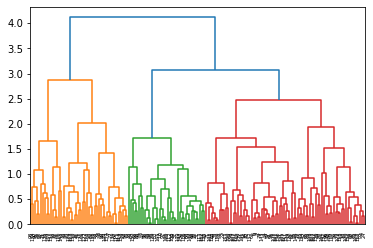

In [194]:
avg_mergings = linkage(X_pca_df,method= 'average',metric = 'euclidean')
dendrogram(avg_mergings)
plt.show()

In [195]:
avg_cluster_labels = cut_tree(avg_mergings, n_clusters=3).reshape(-1, )
avg_cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1,
       0, 1, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 1,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [196]:
print(silhouette_score(X_pca_df,avg_cluster_labels))

0.34749403533527895


In [ ]:
### The silhoutte score seems to be good when pca is used 